# Assignment 2: recommender System

## Code from the lecture

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]
R

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [3]:
def CosineDist(a,b):
    res =  a.dot(b)
    norm = np.linalg.norm(a)*np.linalg.norm(b)
    if norm > 0: #norm ist null wenn keine Berwerung existiert -> Fallunterscheidung
        return res/norm
    else:
        return res
   # return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [4]:
#again, implementation not efficient: better use lamda opperators (later in this course)
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])
D

array([[0.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 0.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 0.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
def getTopN(movie_id,D,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [6]:
#eucledian Distanz Matrix
def EucledianDist(p,q):
    return np.linalg.norm(p-q)


In [7]:
E=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            E[i,j]=EucledianDist(R[:,i],R[:,j])

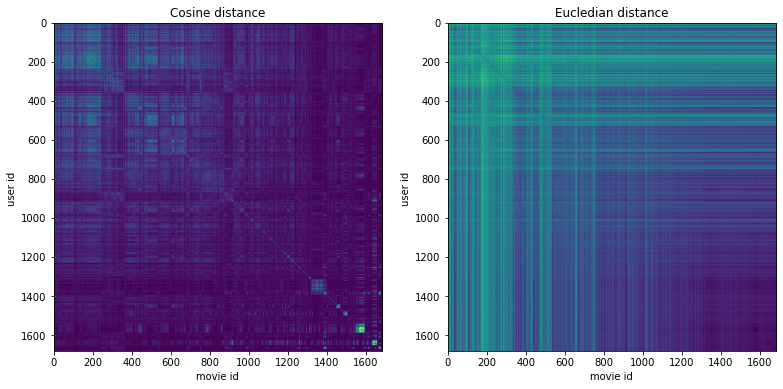

In [8]:
#import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 20))
ax1=fig.add_subplot(1, 3, 1)
plt.xlabel('movie id')
plt.ylabel('user id ')
ax1.title.set_text('Cosine distance')
plt.imshow(D)
ax2= fig.add_subplot(1, 3, 2)
plt.xlabel('movie id')
plt.ylabel('user id ')
ax2.title.set_text('Eucledian distance')
plt.imshow(E)
plt.show()

#### Trainingsdaten erstellen

In [9]:
#Traingsdaten erstellen
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)

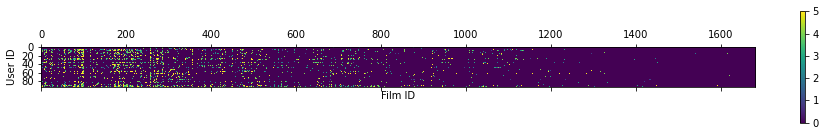

In [10]:
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [11]:
#Trainingsdaten von Cosinusdistanz
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])


In [12]:
#Trainingsdaten von EuklidischerDistanz
E_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            E_train[i,j]=EucledianDist(R_train[:,i],R_train[:,j])


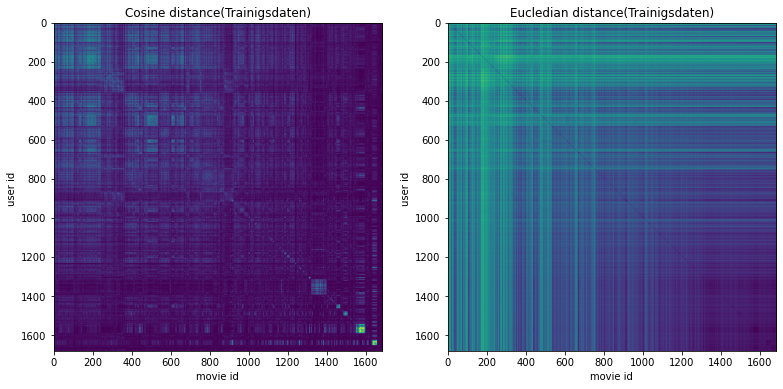

In [13]:
#import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 20))
ax1=fig.add_subplot(1, 3, 1)
plt.xlabel('movie id')
plt.ylabel('user id ')
ax1.title.set_text('Cosine distance(Trainigsdaten)')
plt.imshow(D_train)
ax2= fig.add_subplot(1, 3, 2)
plt.xlabel('movie id')
plt.ylabel('user id ')
ax2.title.set_text('Eucledian distance(Trainigsdaten)')
plt.imshow(E_train)
plt.show()

### Compare
#### Anfragen auf die Coisnusdistanz

In [16]:
CII("Star", D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [17]:
D[getIDbyName("Star"),:].argsort()[-5:]

array([126,   0, 171, 173, 180], dtype=int64)

In [18]:
getTopN(180,D)

array([  0, 120, 173, 171,  49], dtype=int64)

In [19]:
Score_byID(180, D, R_test[5])

(array([ 49, 171, 173, 120,   0], dtype=int64),
 49                    Star Wars (1977)
 171    Empire Strikes Back, The (1980)
 173     Raiders of the Lost Ark (1981)
 120      Independence Day (ID4) (1996)
 0                     Toy Story (1995)
 Name: title, dtype: object,
 array([0., 0., 0., 0., 0.]),
 0.0)

#### Anfragen auf Trainingsdatensätze: Coisnusdistanz

In [20]:
CII("Star", D_train)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [21]:
D_train[getIDbyName("Star"),:].argsort()[-5:]

array([126,   0, 171, 173, 180], dtype=int64)

In [22]:
Score_byID(180, D_train, R_test[5])

(array([ 49, 171, 173,   0, 120], dtype=int64),
 49                    Star Wars (1977)
 171    Empire Strikes Back, The (1980)
 173     Raiders of the Lost Ark (1981)
 0                     Toy Story (1995)
 120      Independence Day (ID4) (1996)
 Name: title, dtype: object,
 array([0., 0., 0., 0., 0.]),
 0.0)

#### Anfragen auf Trainingsdatensätze: Euklidischedistanz

In [23]:
CII("Star", E_train)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
338                   Mad City (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [24]:
E_train[getIDbyName("Star"),:].argsort()[-5:]

array([1242,  338, 1126, 1061,  989], dtype=int64)

In [25]:
Score_byID(180, E_train, R_test[5])

(array([285, 301, 268, 339, 271], dtype=int64),
 285    English Patient, The (1996)
 301       L.A. Confidential (1997)
 268         Full Monty, The (1997)
 339           Boogie Nights (1997)
 271       Good Will Hunting (1997)
 Name: title, dtype: object,
 array([4., 5., 5., 4., 3.]),
 4.2)

In [26]:
test_cos=test_Score(D_train,R_test)
test_euc=test_Score(E_train,R_test)
print('Mean scores of cosine dist: ', np.mean(test_cos))
print('Mean scores of euclidean dist: ', np.mean(test_euc))

Mean scores of cosine dist:  2.1566315789473687
Mean scores of euclidean dist:  1.6273684210526316


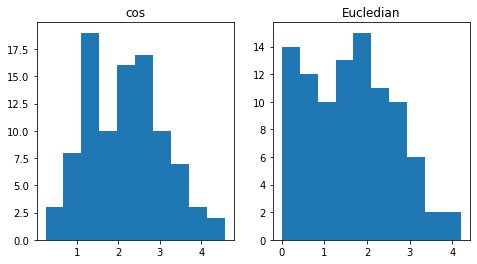

In [27]:
fig=plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 3, 1)
ax1.title.set_text('cos')
plt.hist(test_cos)
ax2= fig.add_subplot(1, 3, 2)
ax2.title.set_text('Eucledian')
plt.hist(test_euc)
plt.show()

Fazit:
    Die Ergebnisse der Cosinusdistanz und des Traingsdatensatzes der Cosinusdistanz stimmen überein.
    Die Ergebnisse Cosinusdistanz und Eucledian zeigen Abweichungen auf. Nach dem Mean Score scheint die Cosinusdistanz besser zu sein

#### 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

### Vorschlag von zufälligen Filmen

In [43]:
#Hier wird eine zufällige Movie ID erstellt-->es werde 5 zufällige Movie IDs zurückgegeben
def RandomMovie():
    movie_id = np.random.randint(np.shape(D)[0], size=5)
    return movie_id 


In [44]:
def Score_byID_Random(Test):
    res_id = RandomMovie()   #Aufruf, um die zufälligen IDs zu generieren
    res_title = getNameByID(res_id)
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)

#compute scores for all test users
def test_Score_random(R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_Random(R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [45]:
test_random=test_Score_random(R_test)

print('Mean scores: ', np.mean(test_random))

Mean scores:  0.2185263157894737


### Die 5 beliebtesten Filme aller User anzeigen#immer die 5 Beliebtesten Filme -->hint: z.B. die Durchschnittsbewertung aller Filme Berechenen und dann sortieren.

In [46]:
def Top5MoviesAllUser():     #Top5 Movies über ALLE User werden hier generiert
    A=np.zeros(np.shape(movies)[0])
    for i in range(0,np.shape(movies)[0]):
        A[i]=np.mean(R[:,i])
    return A.argsort()[-5:]
    #return np.argsort(np.mean(D, axis = 0))[-5:]

def Score_byID_top5Movies(Test):

    res_id =  Top5MoviesAllUser()    #entsprechend hier die Methode aufrufen, um die Top5 Id mitzugeben
    res_title = getNameByID(res_id)                           
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)

def test_Score_top5(R_test_r):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop =np.shape(users)[0] #np.argsort(R_test_r[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_top5Movies(R_test_r[e])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [47]:
top5=Top5MoviesAllUser()
top5

array([173, 257, 180,  99,  49], dtype=int64)

In [51]:
test_top5=test_Score_random(R)
print('Mean scores: ', np.mean(test_top5))

Mean scores:  0.22286320254506894


(array([41., 17., 10., 12.,  6.,  4.,  2.,  0.,  1.,  2.]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 ]),
 <a list of 10 Patch objects>)

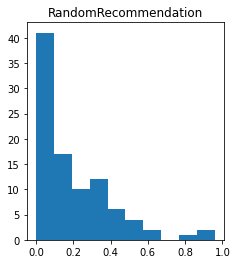

In [49]:
fig=plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 3, 1)
ax1.title.set_text('RandomRecommendation')
plt.hist(test_test)

(array([452., 176., 105.,  81.,  56.,  34.,  19.,  11.,   7.,   2.]),
 array([0.   , 0.128, 0.256, 0.384, 0.512, 0.64 , 0.768, 0.896, 1.024,
        1.152, 1.28 ]),
 <a list of 10 Patch objects>)

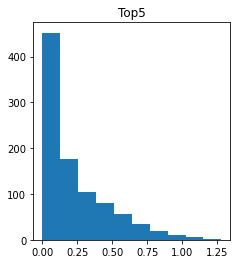

In [35]:
fig=plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 3, 1)
ax1.title.set_text('Top5')
plt.hist(test_test_top5)

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


In [55]:
U,S,V = np.linalg.svd(D)


In [56]:
U.shape, S.shape, V.shape

((1682, 1682), (1682,), (1682, 1682))

In [57]:
#Full Reconstruction
np.allclose(D, np.dot(U[:, :1682]* S,V))

True

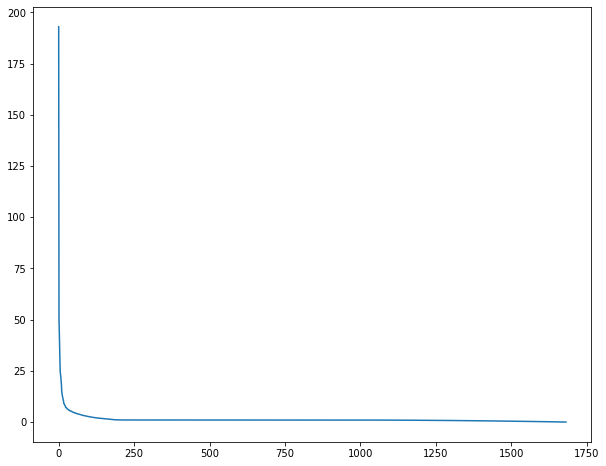

In [58]:
plt.plot(S)

In [67]:
#Reconstruction with loss-->D'
cut = 1250
d_loss = np.dot(U[:,:cut] * S[:cut], V[:cut,:])  #D'
d_loss

array([[ 1.24066069e-01,  3.92517105e-01,  3.27331802e-01, ...,
        -2.94447284e-03,  4.50629429e-02,  4.37451966e-02],
       [ 3.92517105e-01,  6.60808111e-02,  2.82274665e-01, ...,
        -1.73166594e-03,  8.33468597e-02,  7.84816244e-02],
       [ 3.27331802e-01,  2.82274665e-01,  9.23686940e-02, ...,
        -9.11028070e-04,  2.63900037e-03,  9.26804988e-02],
       ...,
       [-2.94447284e-03, -1.73166594e-03, -9.11028070e-04, ...,
         1.62075855e-02,  1.21794563e-03, -4.24976087e-05],
       [ 4.50629429e-02,  8.33468597e-02,  2.63900037e-03, ...,
         1.21794563e-03,  1.26154167e-02,  2.76197275e-03],
       [ 4.37451966e-02,  7.84816244e-02,  9.26804988e-02, ...,
        -4.24976087e-05,  2.76197275e-03,  2.30594804e-02]])

In [75]:
#Recommendation
test_res_SVD=test_Score(d_loss,R_test)
print("Mean score cos:",np.mean(test_cos), "Mean score approx :",np.mean(test_res_SVD))  #Vergleich wie ist vorher der mean score mit test_cos und wie wenn ich einen Teil der Informationen 'cut'

Mean score cos: 2.1566315789473687 Mean score approx : 2.327578947368421


In [73]:
#Reconstruction with loss-->D'
cut2 = 100
d_loss2 = np.dot(U[:,:cut2] * S[:cut2], V[:cut2,:])  #D'
d_loss2

array([[ 0.69428101,  0.40196932,  0.33117682, ..., -0.00075083,
         0.05017976,  0.03050666],
       [ 0.40196932,  0.66802203,  0.28282309, ..., -0.00104962,
         0.08419558,  0.06225614],
       [ 0.33117682,  0.28282309,  0.52962763, ...,  0.00666948,
        -0.00624727,  0.09519335],
       ...,
       [-0.00075083, -0.00104962,  0.00666948, ...,  0.71854854,
         0.00796405, -0.00432418],
       [ 0.05017976,  0.08419558, -0.00624727, ...,  0.00796405,
         0.61719617, -0.02163343],
       [ 0.03050666,  0.06225614,  0.09519335, ..., -0.00432418,
        -0.02163343,  0.36897841]])

In [74]:
#Recommendation
test_res_SVD2=test_Score(d_loss2,R_test)
print("Mean score cos:",np.mean(test_cos), "Mean score approx :",np.mean(test_res_SVD2))

Mean score cos: 2.1566315789473687 Mean score approx : 2.855157894736842


Fazit: Je früher ich einen 'Cut' mache, desto mehr gehen auch die Informationen verloren